<a href="https://colab.research.google.com/github/Yureeets/ml_labs/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Інститут комп'ютерних наук та інформаційних технологій
Кафедра систем штучного інтелекту


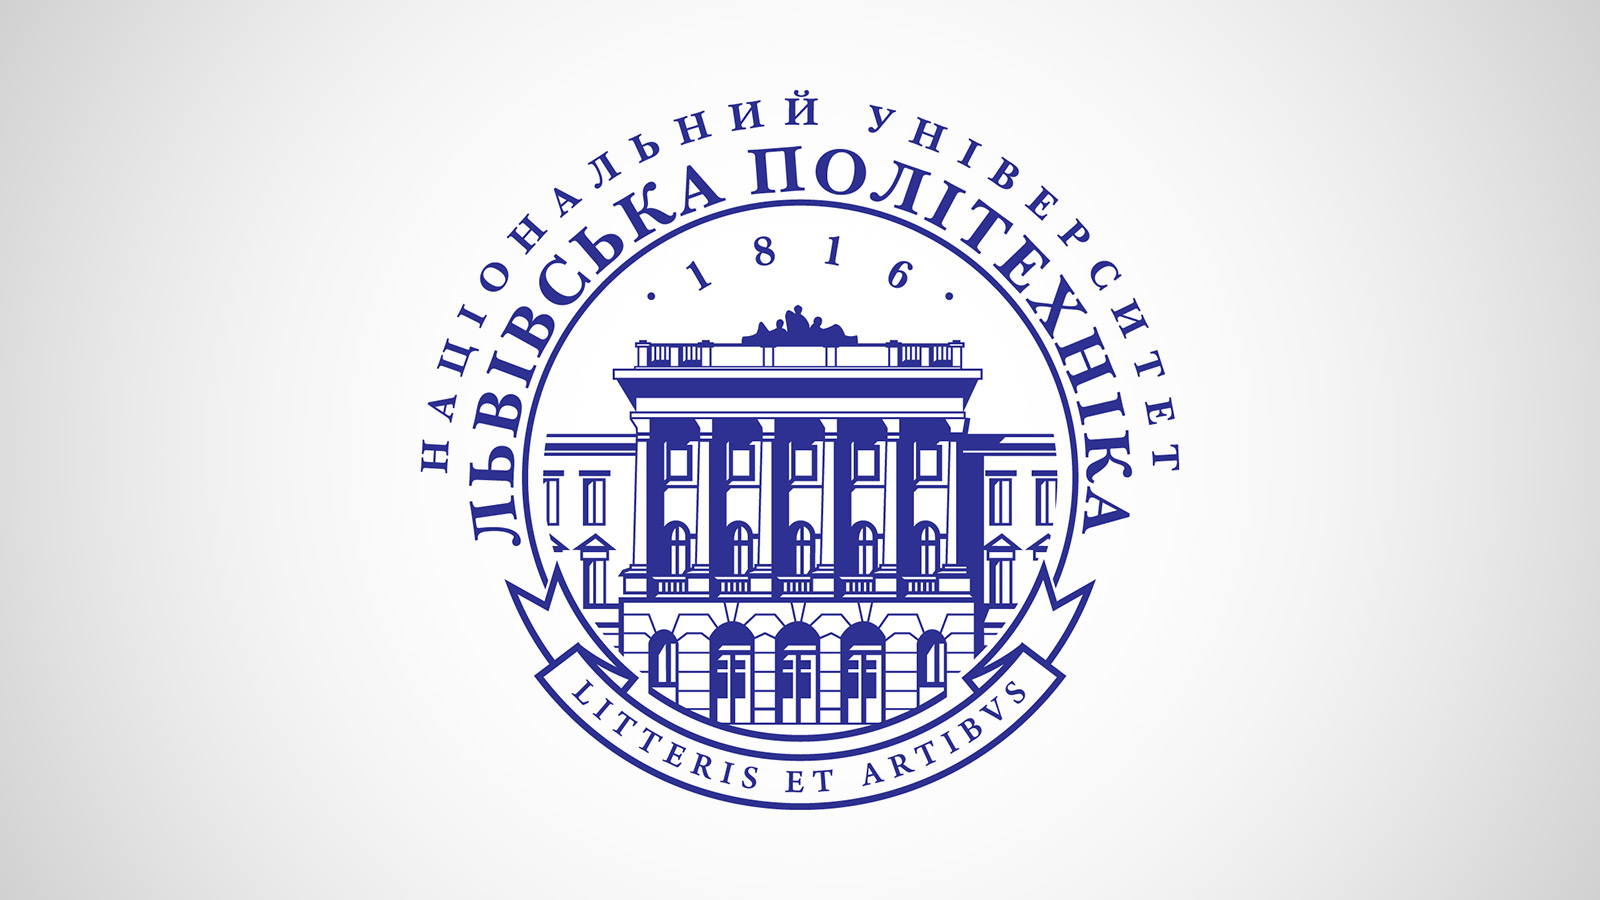
Звіт
Лабораторна робота №3
з курсу “Машинне Навчання”




Виконав:студент  групи  ШІ-23
Полуліх Юрій

Викладач:
Басистюк О.А.








Львів 2024

**Мета:** засвоїти основні відомості про роботу з алгоритмом методу cингулярного розкладу матриці(SVD) та роботу з деревами рішень для регресійних завдань.


# Завдання
**Частина 1. Підготовка даних**
* Завантажити дані згідно варіанту.
* Розділити на тренувальну, валідаційну та тестові вибірки в пропорції 70/15/15
* Обробити NaN значення - або видаленням, або заповненням середнім, або якимось іншим чином. Обраний варіант обгрунтувати.
* Нормалізувати дані - для тренувальних даних обрахувати значення mean(середнього) та standard deviation(стандартного відхилення) для кожної з ознак і перетворити дані віднявши обраховане середнє та поділивши на стандартне відхилення. Зауважте, що на відміну від Z-score тут немає модуля.
* Нормалізувати валідаційні та тестові даних на основі обрахованих mean та std для тренувальних даних

**Частина 2. Побудова дерева рішень**
* Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.
* Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

**Частина 3. Зашумлення.**
* Добавити до тренувальних даних шум. Зробити це додаючи випадкове(uniform(рівномірний) розподіл в межах [-0.1,0.1]) зміщення до кожного елементу тренувальної вибірки датасету по кожній з ознак.
* Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.
* Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

**Частина 4. Знешумлення**
* Обрахувати на оригінальній тренувальній вибірці SVD.
* Обрахувати на зашумленій тренувальній вибірці SVD.
* Реконструювати дані використовуючи SVD обрахований на зашумлених даних для знешумлення.
* Візуалізувати оригінальні, зашумлені і знешумлені дані

**Частина 5**
* Побудувати на основі зашумлених і знешумлених даних тренувальної вибірки дерева рішень. Порівняти їхню точність на валідаційній та тренувальних вибірках.
Візуалізувати отримані дерева рішень


# **Хід Роботи**

# **Частина 1. Підготовка даних**
Імпортуємо необхідні бібліотеки

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt

## 1.1. Завантажити дані згідно варіанту.

Отже, згідно варіанту будемо працювали з датасетом **Car Saler Report**, де будемо передбачати колонку **Price**.

In [ ]:
# Завантажуємо з диску
!wget "https://drive.google.com/uc?export=download&id=1U4UCoHBq-01KaJwfC9pykF2Pj6Zl0jx9" -O filename.zip

--2024-10-05 06:11:15--  https://drive.google.com/uc?export=download&id=1U4UCoHBq-01KaJwfC9pykF2Pj6Zl0jx9
Resolving drive.google.com (drive.google.com)... 173.194.195.138, 173.194.195.102, 173.194.195.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1U4UCoHBq-01KaJwfC9pykF2Pj6Zl0jx9&export=download [following]
--2024-10-05 06:11:15--  https://drive.usercontent.google.com/download?id=1U4UCoHBq-01KaJwfC9pykF2Pj6Zl0jx9&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.184.132, 2607:f8b0:4001:c66::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.184.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 673044 (657K) [application/octet-stream]
Saving to: ‘filename.zip’

filename.zip        100%[===================>] 657.27K  --.-K

Розархівовуємо файл **filename.zip**

In [ ]:
!unzip -q /content/filename.zip

Імпортуємо датасет та переглядаємо:

In [ ]:
df = pd.read_csv('/content/Car Sales.xlsx - car_data.csv', index_col = 'Car_id')
df.head(7)

Date Customer Name Gender  Annual Income  \
Car_id                                                       
C_CND_000001  1/2/2022     Geraldine   Male          13500   
C_CND_000002  1/2/2022           Gia   Male        1480000   
C_CND_000003  1/2/2022        Gianna   Male        1035000   
C_CND_000004  1/2/2022       Giselle   Male          13500   
C_CND_000005  1/2/2022         Grace   Male        1465000   
C_CND_000006  1/2/2022     Guadalupe   Male         850000   
C_CND_000007  1/2/2022        Hailey   Male        1600000   

                                      Dealer_Name     Company       Model  \
Car_id                                                                      
C_CND_000001  Buddy Storbeck's Diesel Service Inc        Ford  Expedition   
C_CND_000002                     C & M Motors Inc       Dodge     Durango   
C_CND_000003                          Capitol KIA    Cadillac    Eldorado   
C_CND_000004               Chrysler of Tri-Cities      Toyota      Celica   
C_CND_000005                    Chrysler Plymouth       Acura          TL   
C_CND_000006                        Classic Chevy  Mitsubishi    Diamante   
C_CND_000007              Clay Johnson Auto Sales      Toyota     Corolla   

                                 Engine Transmission       Color  Price ($)  \
Car_id                                                                        
C_CND_000001  DoubleÂ Overhead Camshaft         Auto       Black      26000   
C_CND_000002  DoubleÂ Overhead Camshaft         Auto       Black      19000   
C_CND_000003          Overhead Camshaft       Manual         Red      31500   
C_CND_000004          Overhead Camshaft       Manual  Pale White      14000   
C_CND_000005  DoubleÂ Overhead Camshaft         Auto         Red      24500   
C_CND_000006          Overhead Camshaft       Manual  Pale White      12000   
C_CND_000007          Overhead Camshaft       Manual  Pale White      14000   

              Dealer_No  Body Style    Phone Dealer_Region  
Car_id                                                      
C_CND_000001  06457-3834        SUV  8264678    Middletown  
C_CND_000002  60504-7114        SUV  6848189        Aurora  
C_CND_000003  38701-8047  Passenger  7298798    Greenville  
C_CND_000004  99301-3882        SUV  6257557         Pasco  
C_CND_000005  53546-9427  Hatchback  7081483    Janesville  
C_CND_000006  85257-3102  Hatchback  7315216    Scottsdale  
C_CND_000007  78758-7841  Passenger  7727879        Austin

In [ ]:
df.shape

(23906, 15)

Переглянемо типи даних, що використовуються в датасеті

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23906 entries, C_CND_000001 to C_CND_023906
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Customer Name  23905 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Dealer_No      23906 non-null  object
 12  Body Style     23906 non-null  object
 13  Phone          23906 non-null  int64 
 14  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(12)
memory usage: 2.9+ MB


## 1.2. Розділити на тренувальну, валідаційну та тестові вибірки в пропорції 70/15/15

Оскільки ми прогнозуємо колонку **Price**, запишемо її в змінну **y**, інші колонки відповідно - **X**. Крім того, видалимо колонку **Customer Name**, тому що вона не несе ніякої користі в прогнозуванні.

In [ ]:
y = df['Price ($)']
X = df.drop(['Price ($)','Customer Name','Date', 'Phone'], axis = 1)

Тепер ми готові розділити наші дані на тренувальну, валідаційну та тестову вибірки:

In [ ]:
X_train, X_template, y_train, y_template = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_template, y_template, test_size=0.5, shuffle=False, random_state = 42)

Переглянемо розміри наших нових вибірок:

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((16734, 11), (3586, 11), (3586, 11))

## 1.3. Обробити NaN значення - або видаленням, або заповненням середнім, або якимось іншим чином. Обраний варіант обгрунтувати.

Переглянемо кількість **Null** значень для кожної з вибірок:

In [ ]:
print(f'Загальна кількість Null значень в тренувальній вибірці: {X_train.isnull().sum().sum()}')

Загальна кількість Null значень в тренувальній вибірці: 0


In [ ]:
print(f'Загальна кількість Null значень в валідаційній вибірці: {X_val.isnull().sum().sum()}')

Загальна кількість Null значень в валідаційній вибірці: 0


In [ ]:
print(f'Загальна кількість Null значень в тестовій вибірці: {X_test.isnull().sum().sum()}')

Загальна кількість Null значень в тестовій вибірці: 0


Бачимо, що тренувальна, валідаційна та тестова вибірки не мають відсутніх даних

## 1.4. Нормалізувати дані - для тренувальних даних обрахувати значення mean(середнього) та standard deviation(стандартного відхилення) для кожної з ознак і перетворити дані віднявши обраховане середнє та поділивши на стандартне відхилення. Зауважте, що на відміну від Z-score тут немає модуля.

Для числових колонок виконаємо стандартизацію:

In [ ]:
features_to_standartize = X_train.select_dtypes(exclude = ['object','datetime64']).columns

scaler_x = StandardScaler()
X_train[features_to_standartize] = scaler_x.fit_transform(X_train[features_to_standartize])

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))

## 1.5. Нормалізувати валідаційні та тестові даних на основі обрахованих mean та std для тренувальних даних

In [ ]:
X_val[features_to_standartize] = scaler_x.transform(X_val[features_to_standartize])
y_val = scaler_y.transform(y_val.values.reshape(-1,1))

X_test[features_to_standartize] = scaler_x.transform(X_test[features_to_standartize])
y_test = scaler_y.transform(y_test.values.reshape(-1,1))

Крім того, в нас залишилася значна кількість категорійних даних, перетворимо і їх для кожної з вибірки:

In [ ]:
features_to_encode = X_train.select_dtypes(include = ['object']).columns

# for feature in features_to_encode:

#   encoder = OrdinalEncoder()

#   X_train[feature] = encoder.fit_transform(X_train[[feature]])
#   X_val[feature] = encoder.transform(X_val[[feature]])
#   X_test[feature] = encoder.transform(X_test[[feature]])
for feature in features_to_encode:
    encoder = OneHotEncoder(sparse_output=False)

    X_train_encoded = encoder.fit_transform(X_train[[feature]])
    X_val_encoded = encoder.transform(X_val[[feature]])
    X_test_encoded = encoder.transform(X_test[[feature]])

    X_train = X_train.join(pd.DataFrame(X_train_encoded,
                                        index=X_train.index,
                                        columns=encoder.get_feature_names_out([feature])))
    X_val = X_val.join(pd.DataFrame(X_val_encoded,
                                    index=X_val.index,
                                    columns=encoder.get_feature_names_out([feature])))
    X_test = X_test.join(pd.DataFrame(X_test_encoded,
                                      index=X_test.index,
                                      columns=encoder.get_feature_names_out([feature])))

    X_train.drop(columns=[feature], inplace=True)
    X_val.drop(columns=[feature], inplace=True)
    X_test.drop(columns=[feature], inplace=True)

Переглянемо датасет:

In [ ]:
X_train

Annual Income  Gender_Female  Gender_Male  \
Car_id                                                    
C_CND_000001      -1.128149            0.0          1.0   
C_CND_000002       0.853091            0.0          1.0   
C_CND_000003       0.251896            0.0          1.0   
C_CND_000004      -1.128149            0.0          1.0   
C_CND_000005       0.832826            0.0          1.0   
...                     ...            ...          ...   
C_CND_016730      -1.128149            0.0          1.0   
C_CND_016731      -0.126384            0.0          1.0   
C_CND_016732      -0.538438            0.0          1.0   
C_CND_016733      -0.515471            1.0          0.0   
C_CND_016734      -0.262835            0.0          1.0   

              Dealer_Name_Buddy Storbeck's Diesel Service Inc  \
Car_id                                                          
C_CND_000001                                              1.0   
C_CND_000002                                              0.0   
C_CND_000003                                              0.0   
C_CND_000004                                              0.0   
C_CND_000005                                              0.0   
...                                                       ...   
C_CND_016730                                              0.0   
C_CND_016731                                              0.0   
C_CND_016732                                              0.0   
C_CND_016733                                              0.0   
C_CND_016734                                              0.0   

              Dealer_Name_C & M Motors Inc  Dealer_Name_Capitol KIA  \
Car_id                                                                
C_CND_000001                           0.0                      0.0   
C_CND_000002                           1.0                      0.0   
C_CND_000003                           0.0                      1.0   
C_CND_000004                           0.0                      0.0   
C_CND_000005                           0.0                      0.0   
...                                    ...                      ...   
C_CND_016730                           0.0                      0.0   
C_CND_016731                           0.0                      0.0   
C_CND_016732                           0.0                      0.0   
C_CND_016733                           0.0                      0.0   
C_CND_016734                           0.0                      0.0   

              Dealer_Name_Chrysler Plymouth  \
Car_id                                        
C_CND_000001                            0.0   
C_CND_000002                            0.0   
C_CND_000003                            0.0   
C_CND_000004                            0.0   
C_CND_000005                            1.0   
...                                     ...   
C_CND_016730                            0.0   
C_CND_016731                            0.0   
C_CND_016732                            0.0   
C_CND_016733                            0.0   
C_CND_016734                            0.0   

              Dealer_Name_Chrysler of Tri-Cities  Dealer_Name_Classic Chevy  \
Car_id                                                                        
C_CND_000001                                 0.0                        0.0   
C_CND_000002                                 0.0                        0.0   
C_CND_000003                                 0.0                        0.0   
C_CND_000004                                 1.0                        0.0   
C_CND_000005                                 0.0                        0.0   
...                                          ...                        ...   
C_CND_016730                                 0.0                        0.0   
C_CND_016731                                 0.0                        0.0   
C_CND_016732                                 0.0                        0.

Тепер ми готові до побудови дерева!

# **Частина 2. Побудова дерева рішень**

## 2.1. Побудувати 3 різні дерева рішень (Decision tree) з різною глибиною на основі даних згідно варіанту.

Побудуємо наступні дерева з глибиною 1,2 та 5.

In [ ]:
depths = [1, 2, 5]
decision_trees = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=32)
    model.fit(X_train, y_train)
    decision_trees.append(model)

## 2.2. Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

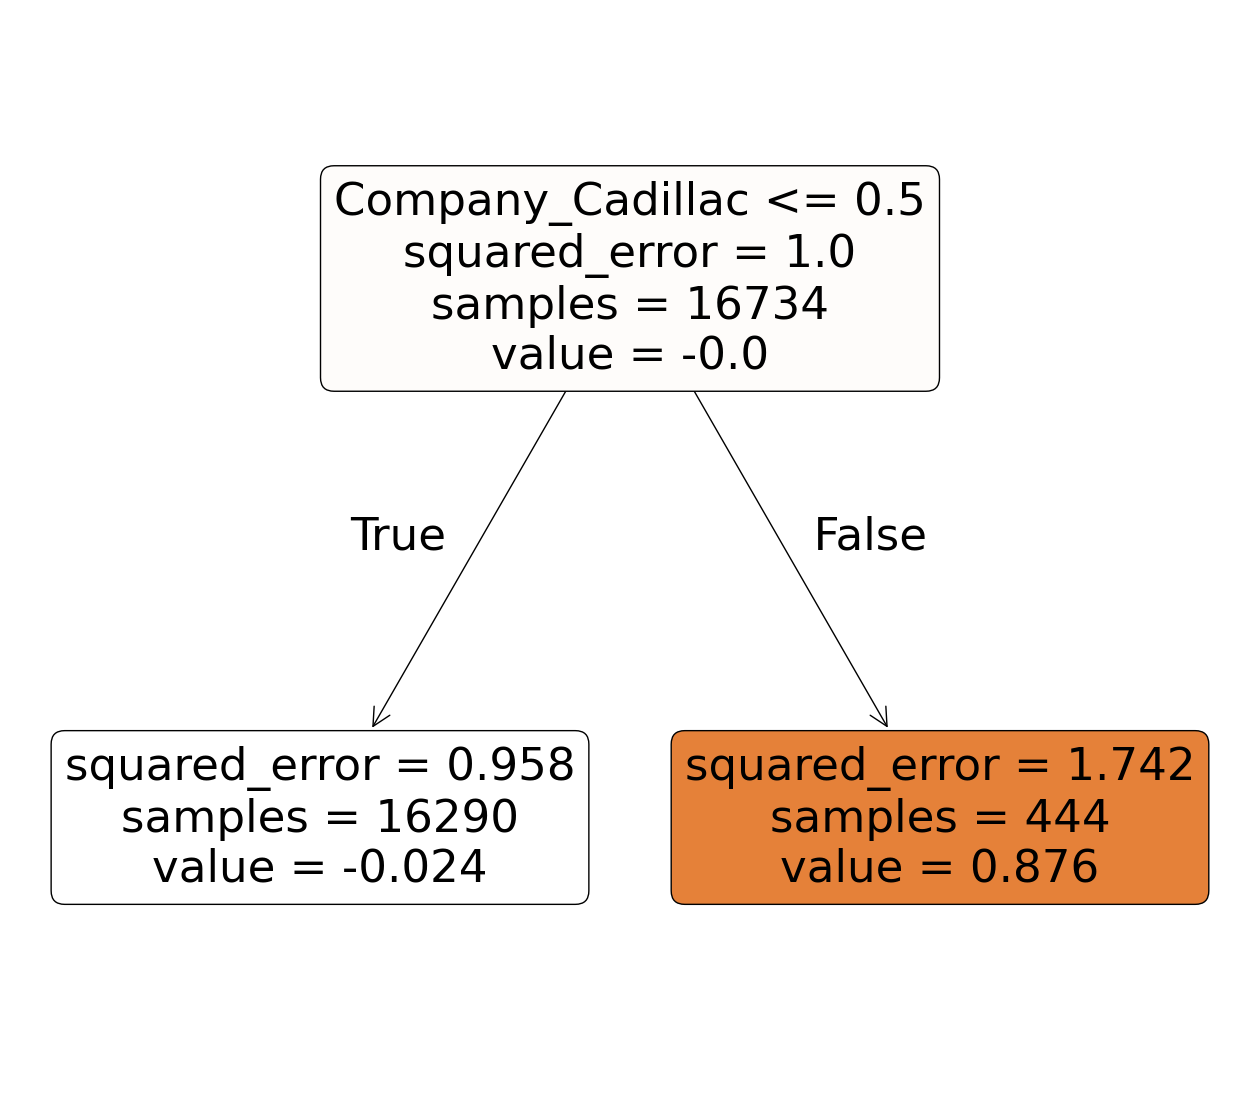

 Depth of decision tree => 1

 MSE on train data => 0.9791
 MAE on train data => 0.7570
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9689
 MAE on validation data => 0.7514
 Accuracy on validation data => 0.6933

 MSE on test data => 0.9957
 MAE on test data => 0.7627
 Accuracy on test data => 0.6910



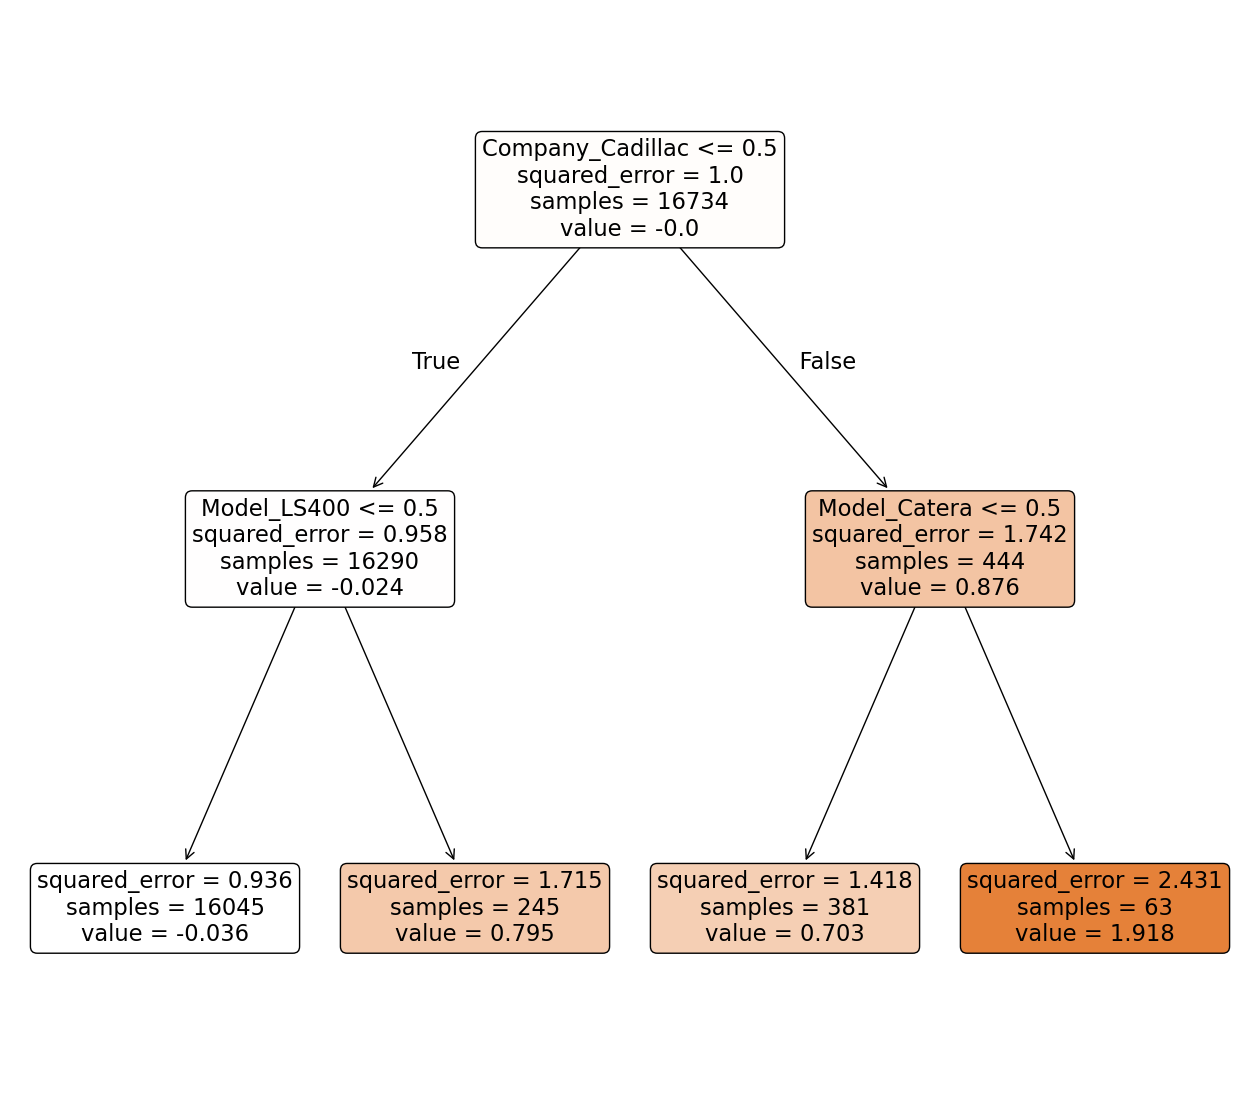

 Depth of decision tree => 2

 MSE on train data => 0.9644
 MAE on train data => 0.7502
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9459
 MAE on validation data => 0.7421
 Accuracy on validation data => 0.6963

 MSE on test data => 0.9815
 MAE on test data => 0.7562
 Accuracy on test data => 0.6916



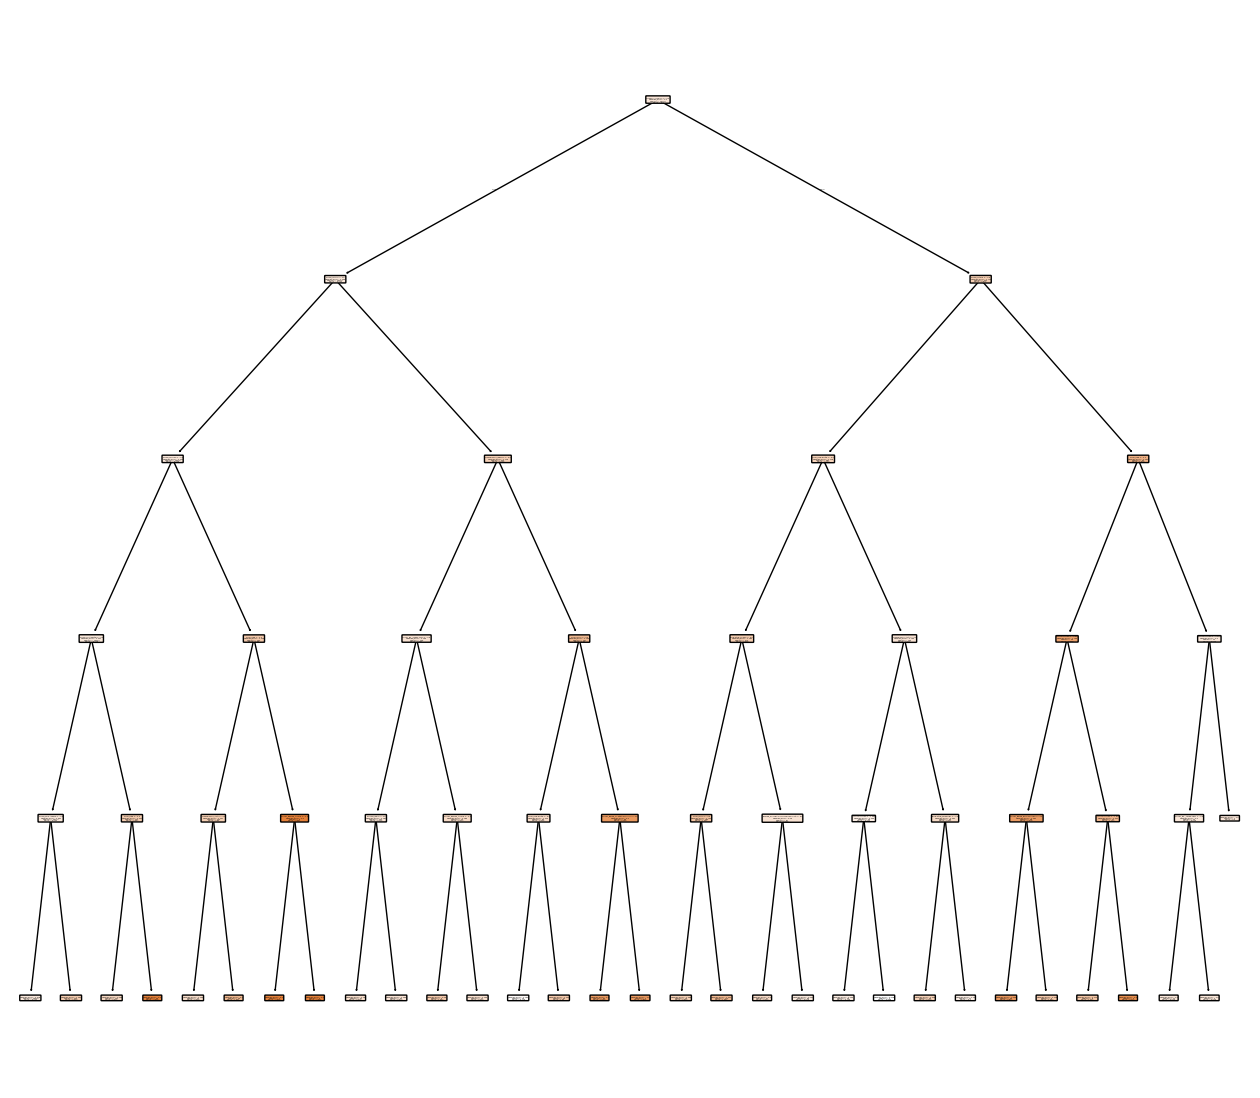

 Depth of decision tree => 5

 MSE on train data => 0.8842
 MAE on train data => 0.7108
 Accuracy on train data => 1.0000

 MSE on validation data => 0.8556
 MAE on validation data => 0.6984
 Accuracy on validation data => 0.7089

 MSE on test data => 0.9051
 MAE on test data => 0.7178
 Accuracy on test data => 0.7033



In [ ]:
for tree in decision_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(tree.feature_names_in_), filled=True, rounded=True)
    plt.show()
    y_pred_train = tree.predict(X_train)
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)
    threshold = 0.1

    y_pred_train_bin = (y_pred_train <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)


    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",


          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n",
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n")

Отже, можемо побачити, що для **дерева глибиною 1** точність валідаційної вибірки **69.3%**, тестової - **69.1%**.

Для **дерева глибиною 2** бачимо погіршення точностей, а саме **69.6%** для валідаційноі вибірки та **69.1%** для тренувальної.

 Для **дерева глибиною 5** на валідаційній вибірці **70.8%** та **70.3%** на тестувальній вибірці.

Отже, можемо зробити висновок, що збільшення глибини дерева призводить до покращення точності на валідаційній і тестовій вибірках, особливо помітно для дерева глибиною 5.

# **Частина 3. Зашумлення.**

## 3.1. Добавити до тренувальних даних шум. Зробити це додаючи випадкове(uniform(рівномірний) розподіл в межах [-0.1,0.1]) зміщення до кожного елементу тренувальної вибірки датасету по кожній з ознак.

In [ ]:
X_train.head()

Annual Income  Gender_Female  Gender_Male  \
Car_id                                                    
C_CND_000001      -1.128149            0.0          1.0   
C_CND_000002       0.853091            0.0          1.0   
C_CND_000003       0.251896            0.0          1.0   
C_CND_000004      -1.128149            0.0          1.0   
C_CND_000005       0.832826            0.0          1.0   

              Dealer_Name_Buddy Storbeck's Diesel Service Inc  \
Car_id                                                          
C_CND_000001                                              1.0   
C_CND_000002                                              0.0   
C_CND_000003                                              0.0   
C_CND_000004                                              0.0   
C_CND_000005                                              0.0   

              Dealer_Name_C & M Motors Inc  Dealer_Name_Capitol KIA  \
Car_id                                                                
C_CND_000001                           0.0                      0.0   
C_CND_000002                           1.0                      0.0   
C_CND_000003                           0.0                      1.0   
C_CND_000004                           0.0                      0.0   
C_CND_000005                           0.0                      0.0   

              Dealer_Name_Chrysler Plymouth  \
Car_id                                        
C_CND_000001                            0.0   
C_CND_000002                            0.0   
C_CND_000003                            0.0   
C_CND_000004                            0.0   
C_CND_000005                            1.0   

              Dealer_Name_Chrysler of Tri-Cities  Dealer_Name_Classic Chevy  \
Car_id                                                                        
C_CND_000001                                 0.0                        0.0   
C_CND_000002                                 0.0                        0.0   
C_CND_000003                                 0.0                        0.0   
C_CND_000004                                 1.0                        0.0   
C_CND_000005                                 0.0                        0.0   

              Dealer_Name_Clay Johnson Auto Sales  ...  Body Style_Passenger  \
Car_id                                             ...                         
C_CND_000001                                  0.0  ...                   0.0   
C_CND_000002                                  0.0  ...                   0.0   
C_CND_000003                                  0.0  ...                   1.0   
C_CND_000004                                  0.0  ...                   0.0   
C_CND_000005                                  0.0  ...                   0.0   

              Body Style_SUV  Body Style_Sedan  Dealer_Region_Aurora  \
Car_id                                                                 
C_CND_000001             1.0               0.0                   0.0   
C_CND_000002             1.0               0.0                   1.0   
C_CND_000003             0.0               0.0                   0.0   
C_CND_000004             1.0               0.0                   0.0   
C_CND_000005             0.0               0.0                   0.0   

              Dealer_Region_Austin  Dealer_Region_Greenville  \
Car_id                                                         
C_CND_000001                   0.0                       0.0   
C_CND_000002                   0.0                       0.0   
C_CND_000003                   0.0                       1.0   
C_CND_000004                   0.0                       0.0   
C_CND_000005                   0.0                       0.0   

              Dealer_Region_Janesville  Dealer_Region_Middletown  \
Car_id                                                             
C_CND_000001                       0.0                       1.0   
C_CND_000002                       0.0     

Ініціалізуємо та додаємо шум лише для числових значень, оскільки якщо додамо до категорійних воно може значно вплинути на точність:

In [ ]:
X_noise = np.random.uniform(low=-0.1, high=0.1, size= X_train.shape)
X_train_noise = X_train.copy()

In [ ]:
# for feature in features_to_standartize:
X_noise = np.random.uniform(low=-0.1, high=0.1, size= X_train.shape)
  # X_train_noise[feature] = X_train_noise[feature] + X_noise
X_train_noise = X_train_noise + X_noise


## 3.2. Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.

In [ ]:
depths = [1, 2, 5]
noise_decision_trees = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=32)
    model.fit(X_train_noise, y_train)
    noise_decision_trees.append(model)

## 3.3. Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.


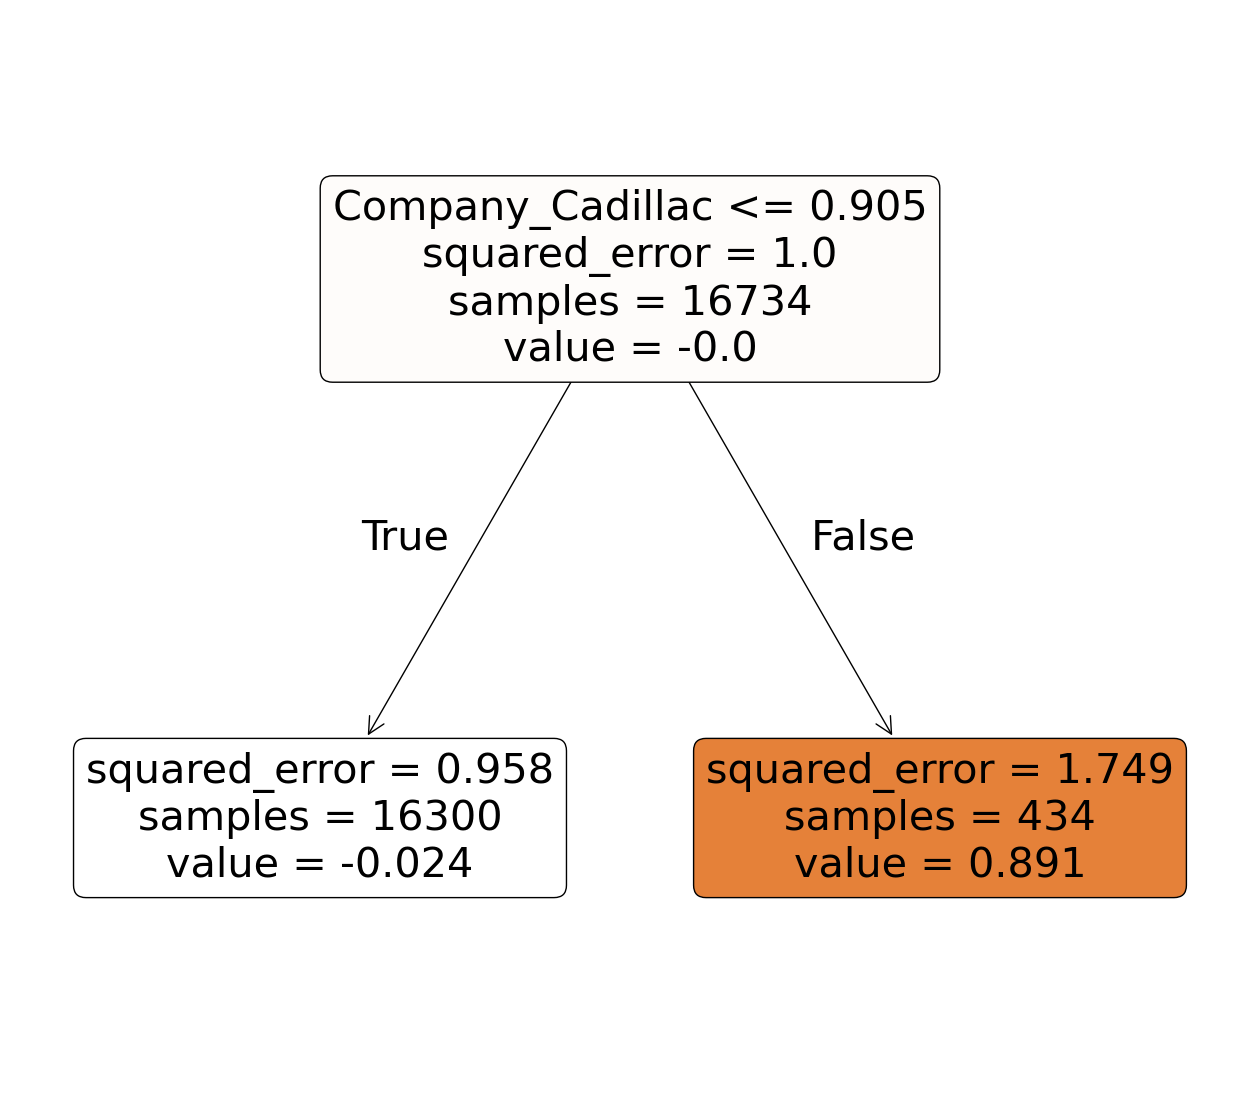

 Depth of decision tree => 1

 MSE on train data => 0.9791
 MAE on train data => 0.7572
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9690
 MAE on validation data => 0.7516
 Accuracy on validation data => 0.6933

 MSE on test data => 0.9956
 MAE on test data => 0.7629
 Accuracy on test data => 0.6910



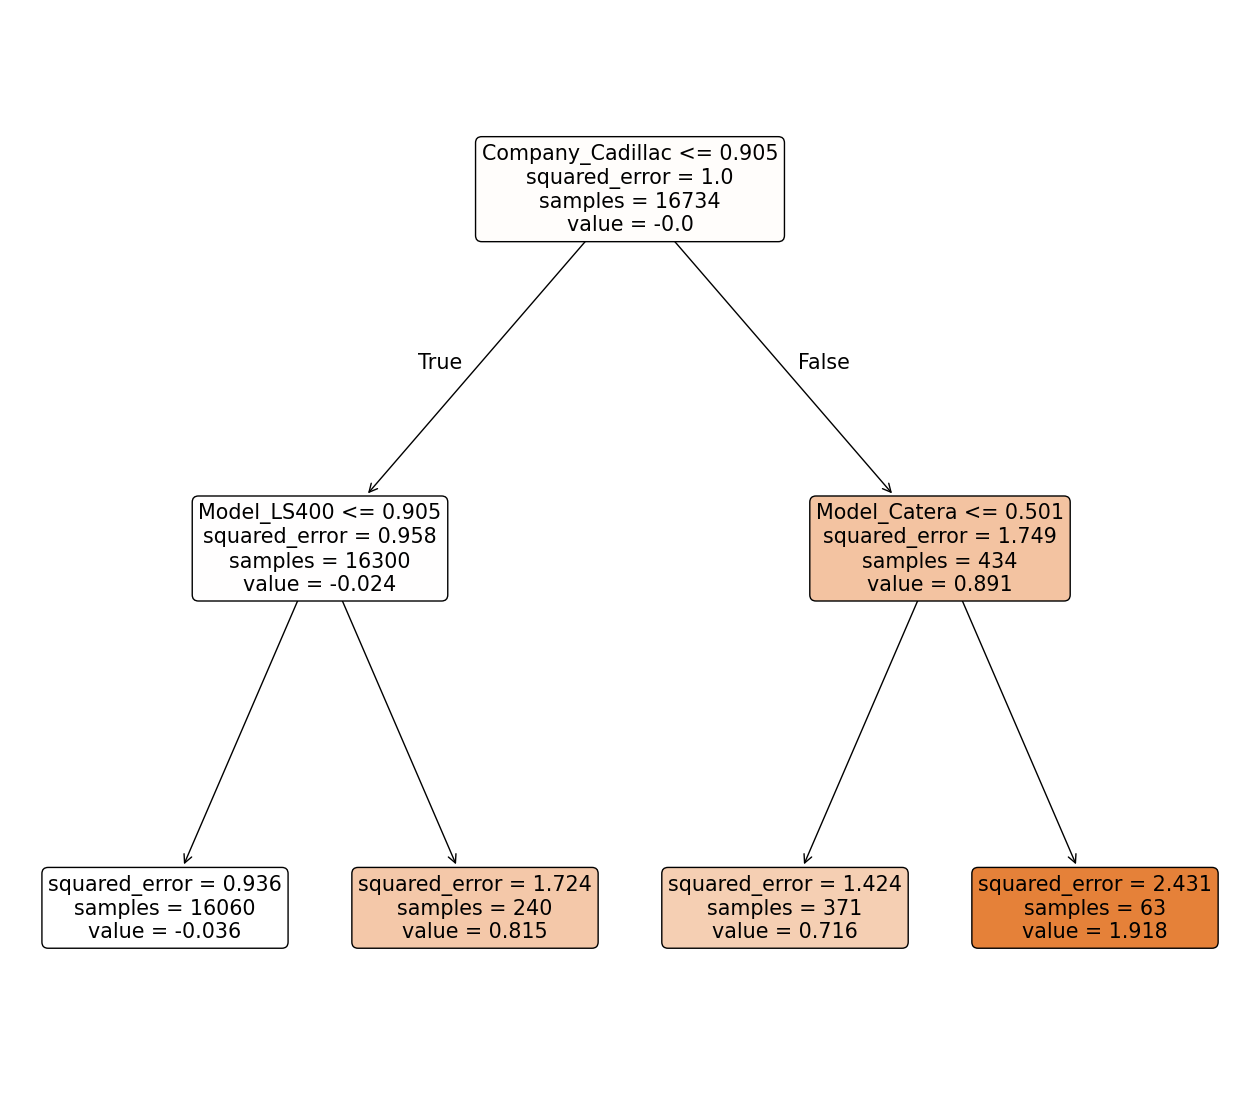

 Depth of decision tree => 2

 MSE on train data => 0.9644
 MAE on train data => 0.7504
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9459
 MAE on validation data => 0.7424
 Accuracy on validation data => 0.6963

 MSE on test data => 0.9815
 MAE on test data => 0.7564
 Accuracy on test data => 0.6916



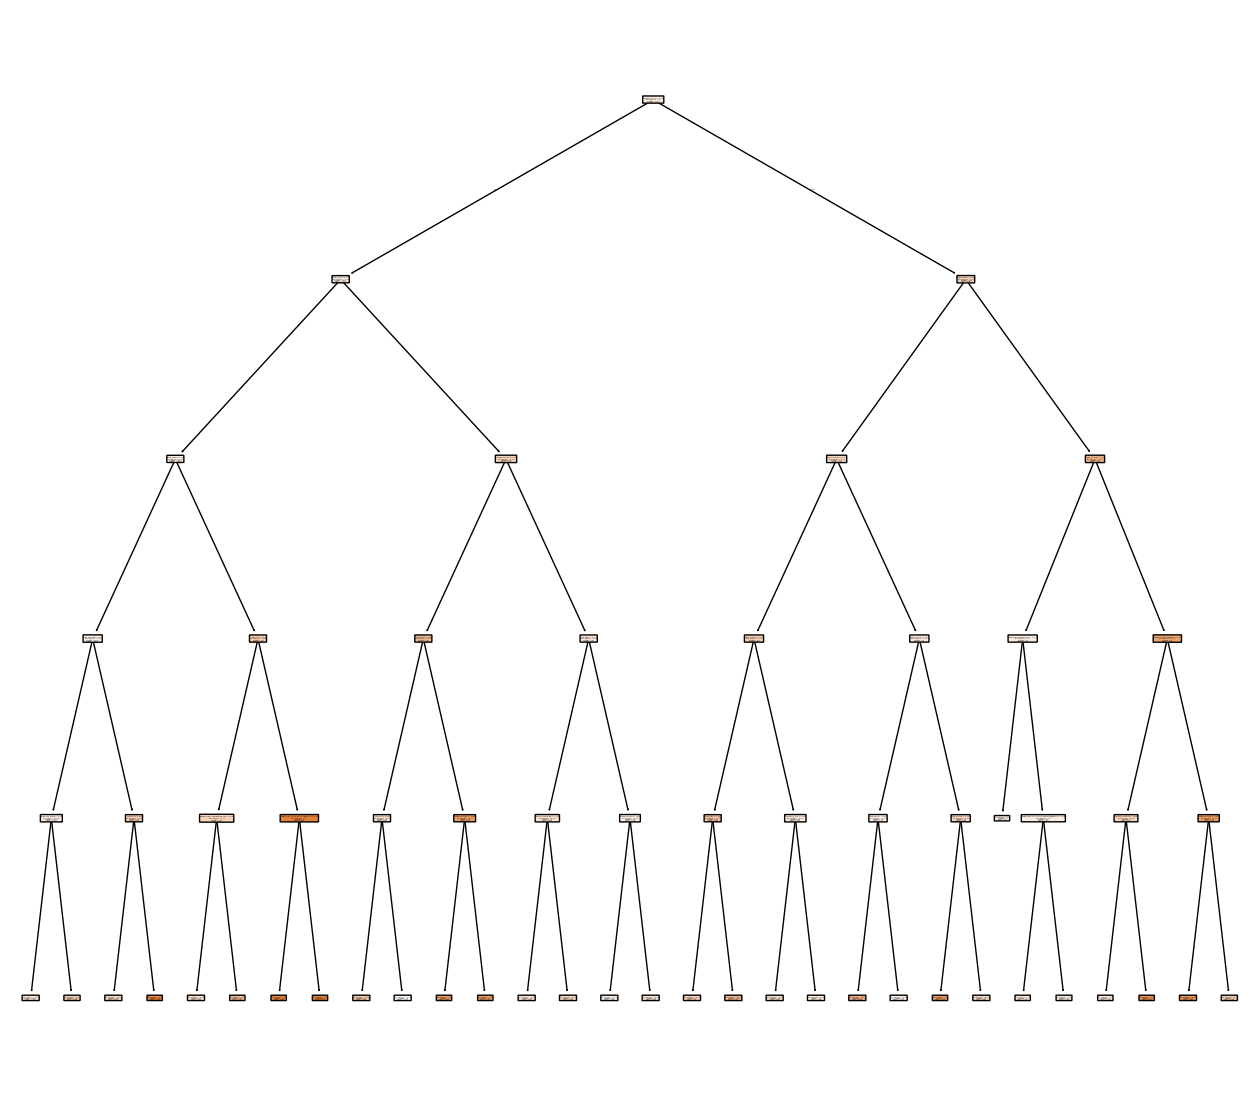

 Depth of decision tree => 5

 MSE on train data => 0.8899
 MAE on train data => 0.7111
 Accuracy on train data => 1.0000

 MSE on validation data => 0.8682
 MAE on validation data => 0.6996
 Accuracy on validation data => 0.7097

 MSE on test data => 0.9114
 MAE on test data => 0.7176
 Accuracy on test data => 0.7041



In [ ]:
for tree in noise_decision_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(tree.feature_names_in_), filled=True, rounded=True)
    plt.show()
    y_pred_train = tree.predict(X_train)
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)
    threshold = 0.1

    y_pred_train_bin = (y_pred_train <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)


    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",


          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n",
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n")

**Глибина 1:** Точність на валідаційній вибірці — **69.3%**, на тестовій — **69.1%**.

**Глибина 2:** Незначне погіршення точності на валідаційній вибірці — **69.6%**, на тестовій вибірці — стабільні **69.1%**.

**Глибина 5:** Відчутне покращення: точність на валідаційній вибірці — **70.9%**, на тестовій — **70.4%**.

# **Частина 4. Знешумлення**

## 4.1. Обрахувати на оригінальній тренувальній вибірці SVD.

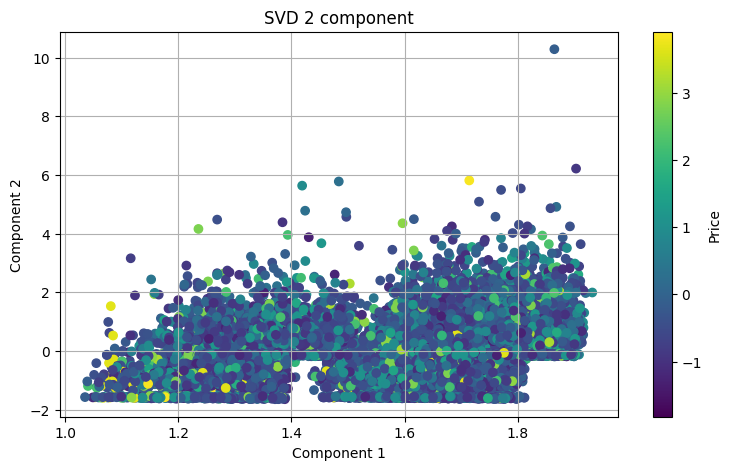

In [ ]:
svd_train = TruncatedSVD(n_components=2)
X_train_svd = svd_train.fit_transform(X_train)



plt.figure(figsize = (9,5))
scatter = plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, cmap='viridis')
plt.title('SVD 2 component')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.colorbar(scatter, label='Price')
plt.grid(True)
plt.show()

Як бачимо перша компонента пояснює **0.4%** дисперсії, друга **12%**.

In [ ]:
svd_train.explained_variance_ratio_

array([0.0043628 , 0.12034825])

## 4.2. Обрахувати на зашумленій тренувальній вибірці SVD.

Для початку нам потрібно вибрати відповідну кількість компонент для SVD для цього виведемо графік де змодемо побачити, яку кількість дисперсії покриває різна кількість компонент.

Number of features: 241


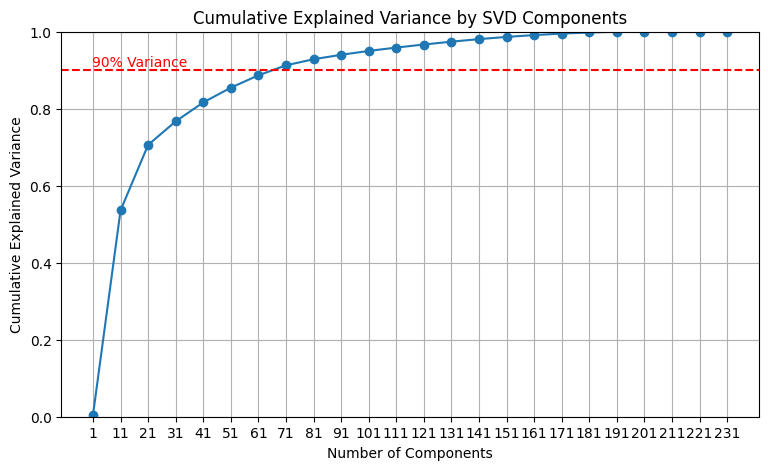

In [ ]:

print("Number of features:",X_train.shape[1])
n_components_range = range(1, X_train.shape[1],10)

explained_variance = []

for n_components in n_components_range:
    svd_train = TruncatedSVD(n_components=n_components)
    svd_train.fit(X_train)
    explained_variance.append(svd_train.explained_variance_ratio_.sum())

plt.figure(figsize=(9, 5))
plt.plot(n_components_range, explained_variance, marker='o')
plt.title('Cumulative Explained Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(n_components_range)
plt.grid(True)
plt.ylim(0, 1)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.text(0.5, 0.91, '90% Variance', color='red')
plt.show()

Отже, згідно графіку можемо скористатися саме **91 компонентою**, як параметр для нашого **SVD**, оскільки він покриває бажану кількість дисперсії.

In [ ]:
svd_noised = TruncatedSVD(n_components = 100)
X_train_noise_svd = svd_noised.fit_transform(X_train_noise)

In [ ]:
np.sum(svd_noised.explained_variance_ratio_)

0.902605569999831

## 4.3. Реконструювати дані використовуючи SVD обрахований на зашумлених даних для знешумлення.

In [ ]:
X_train_denoised = svd_noised.inverse_transform(X_train_noise_svd)

Для зручності перетворимо в Датафрейм:

In [ ]:
X_train_denoised = pd.DataFrame(X_train_denoised, columns = X_train_noise.columns)

## 4.4. Візуалізувати оригінальні, зашумлені і знешумлені дані

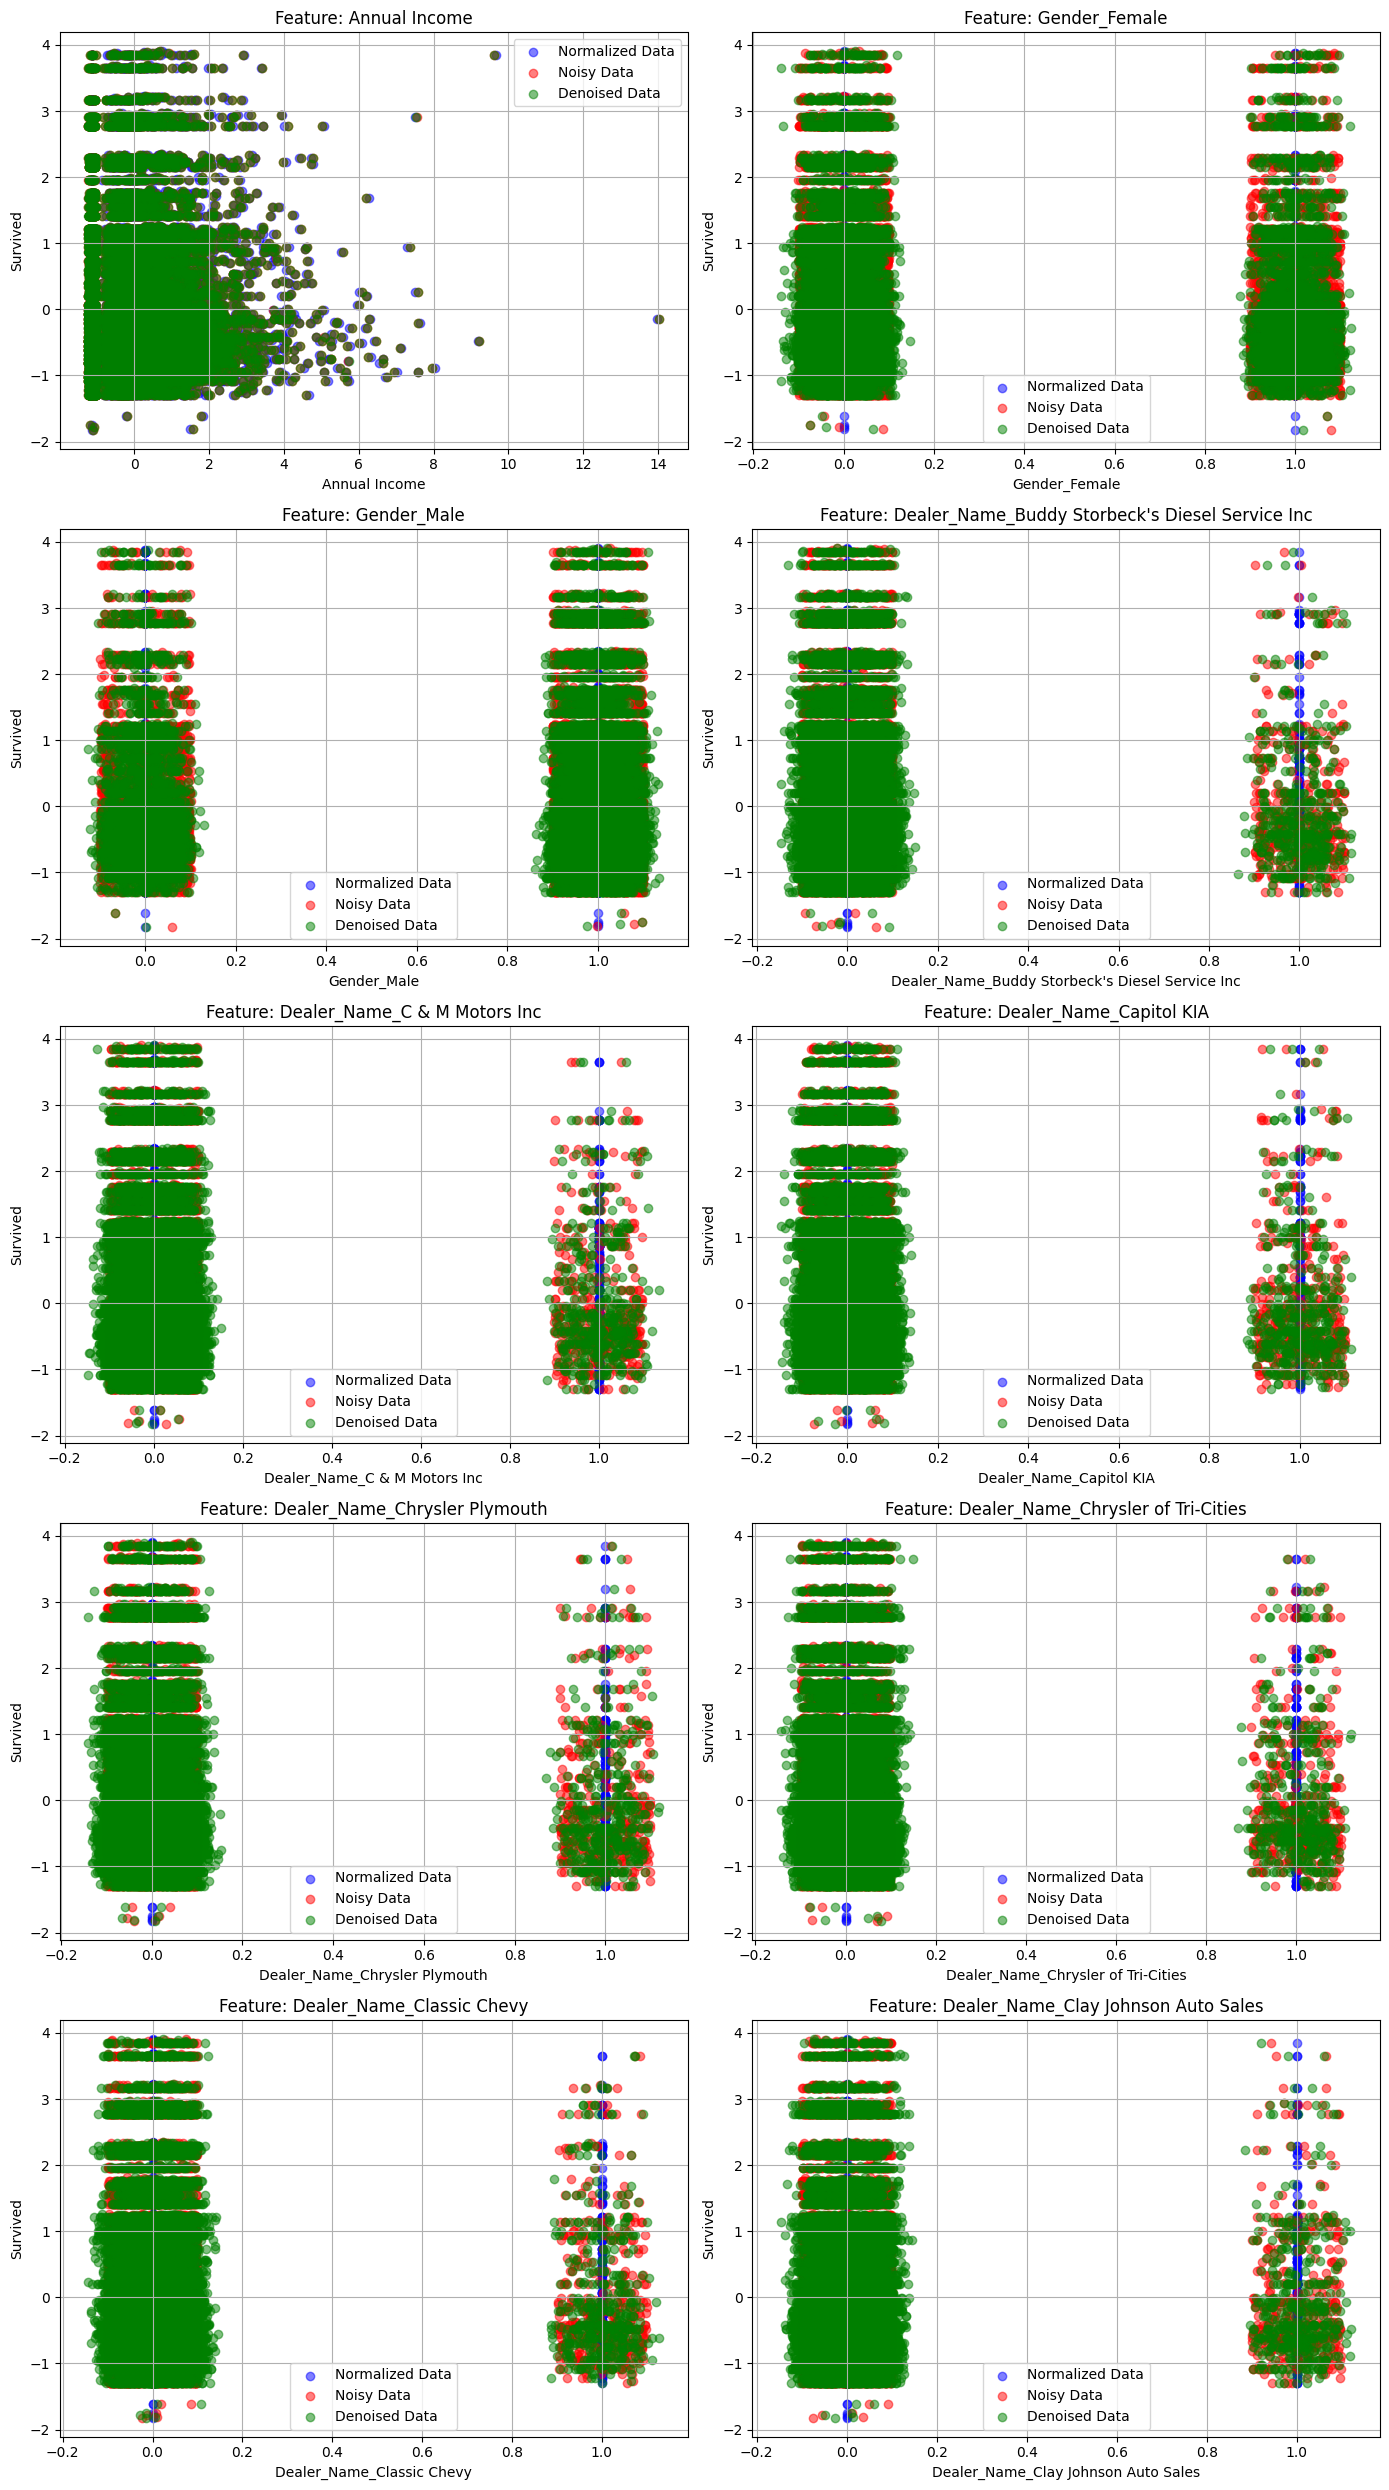

In [ ]:
feature_names = list(X_train.columns[:10])
n_cols = 2
n_rows = (len(feature_names) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 5 * n_rows))

for j in range(len(feature_names)):
    ax = axes[j // n_cols, j % n_cols]
    ax.scatter(X_train.iloc[:, j], y_train, c='blue', label='Normalized Data', alpha=0.5)
    ax.scatter(X_train_noise.iloc[:, j], y_train, c='red', label='Noisy Data', alpha=0.5)
    ax.scatter(X_train_denoised.iloc[:, j], y_train, c='green', label='Denoised Data', alpha=0.5)

    ax.set_xlabel(f'{feature_names[j]}')
    ax.set_ylabel('Survived')
    ax.legend()
    ax.grid(True)
    ax.set_title(f'Feature: {feature_names[j]}')

for j in range(len(feature_names), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# **Частина 5**

Побудувати на основі зашумлених і знешумлених даних тренувальної вибірки дерева рішень. Порівняти їхню точність на валідаційній та тренувальних вибірках. Візуалізувати отримані дерева рішень

## 5.1. Дерево рішень на зашумлених даних.

In [ ]:
depths = [1, 2, 5]
noise_decision_trees = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=32)
    model.fit(X_train_noise, y_train)
    noise_decision_trees.append(model)

Відобразимо:

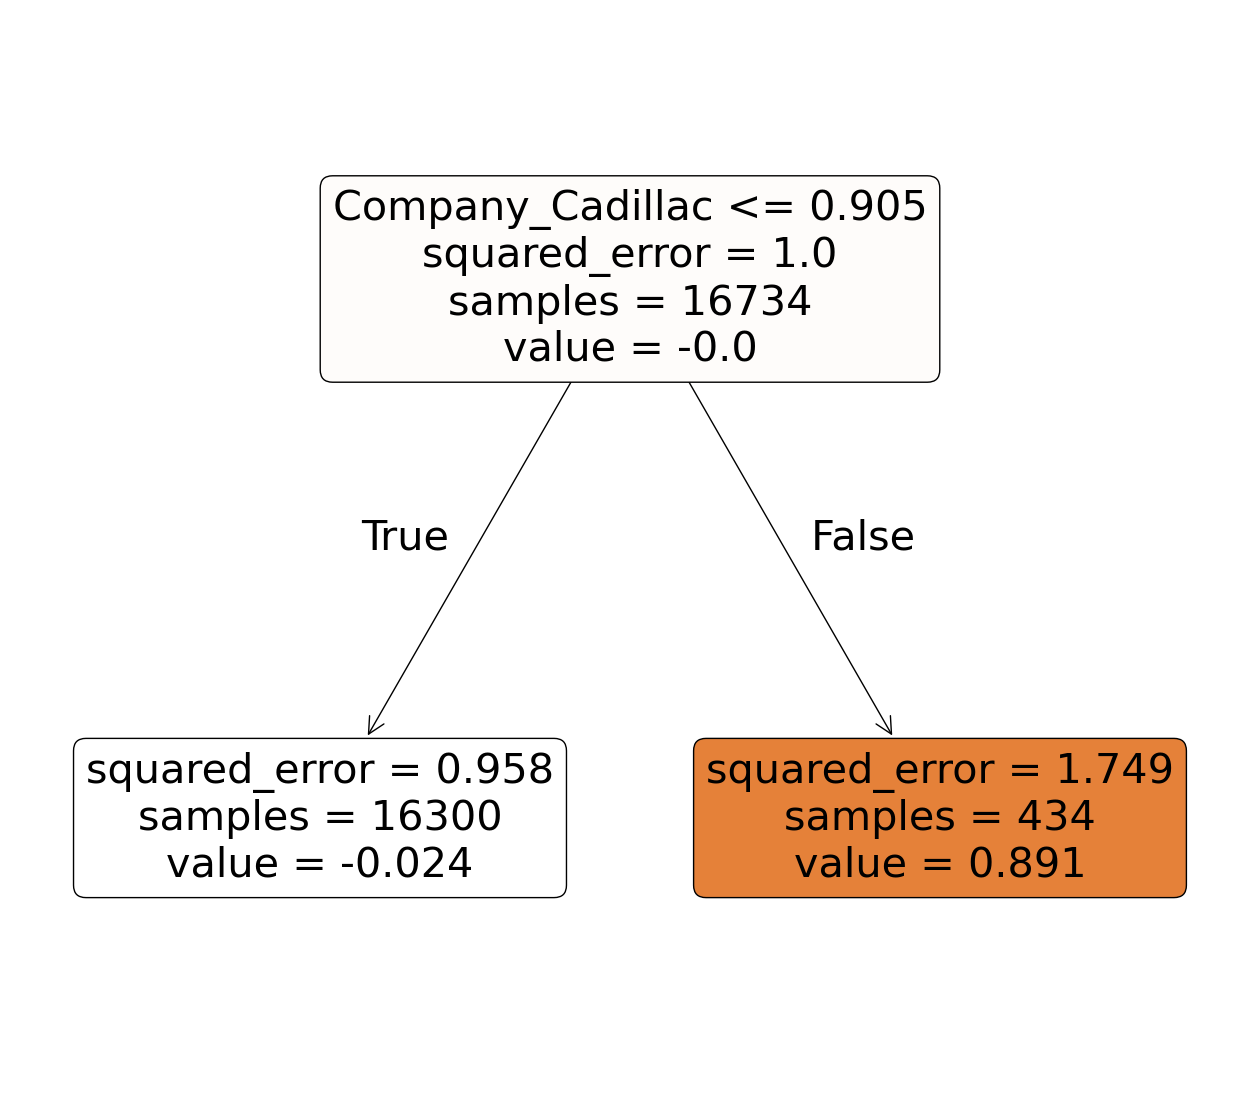

 Depth of decision tree => 1

 MSE on train data => 0.9791
 MAE on train data => 0.7572
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9690
 MAE on validation data => 0.7516
 Accuracy on validation data => 0.6933

 MSE on test data => 0.9956
 MAE on test data => 0.7629
 Accuracy on test data => 0.6910



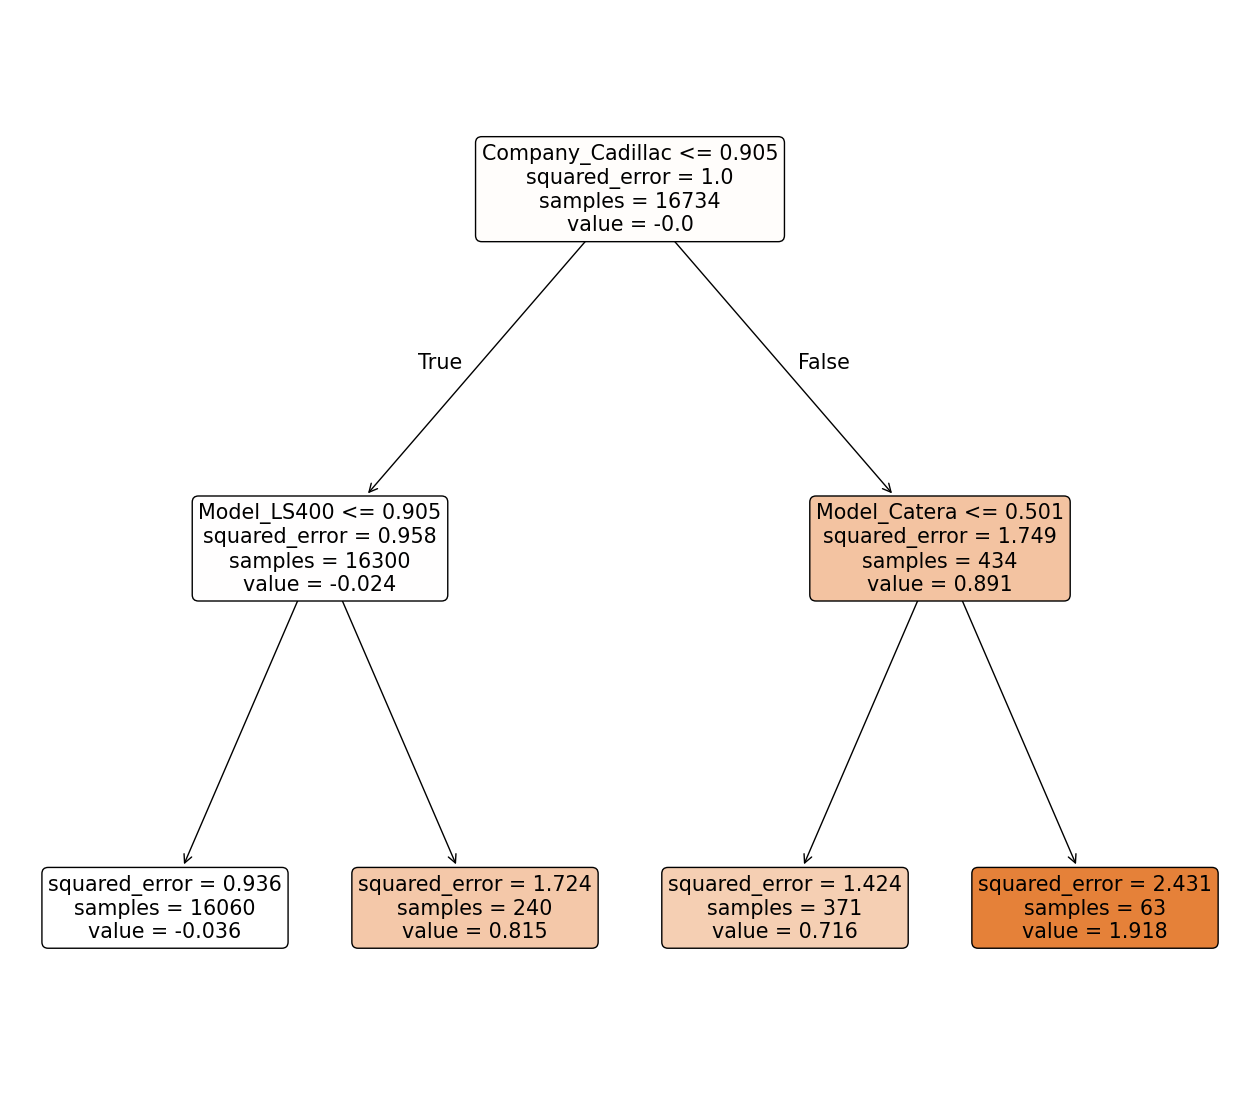

 Depth of decision tree => 2

 MSE on train data => 0.9644
 MAE on train data => 0.7504
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9459
 MAE on validation data => 0.7424
 Accuracy on validation data => 0.6963

 MSE on test data => 0.9815
 MAE on test data => 0.7564
 Accuracy on test data => 0.6916



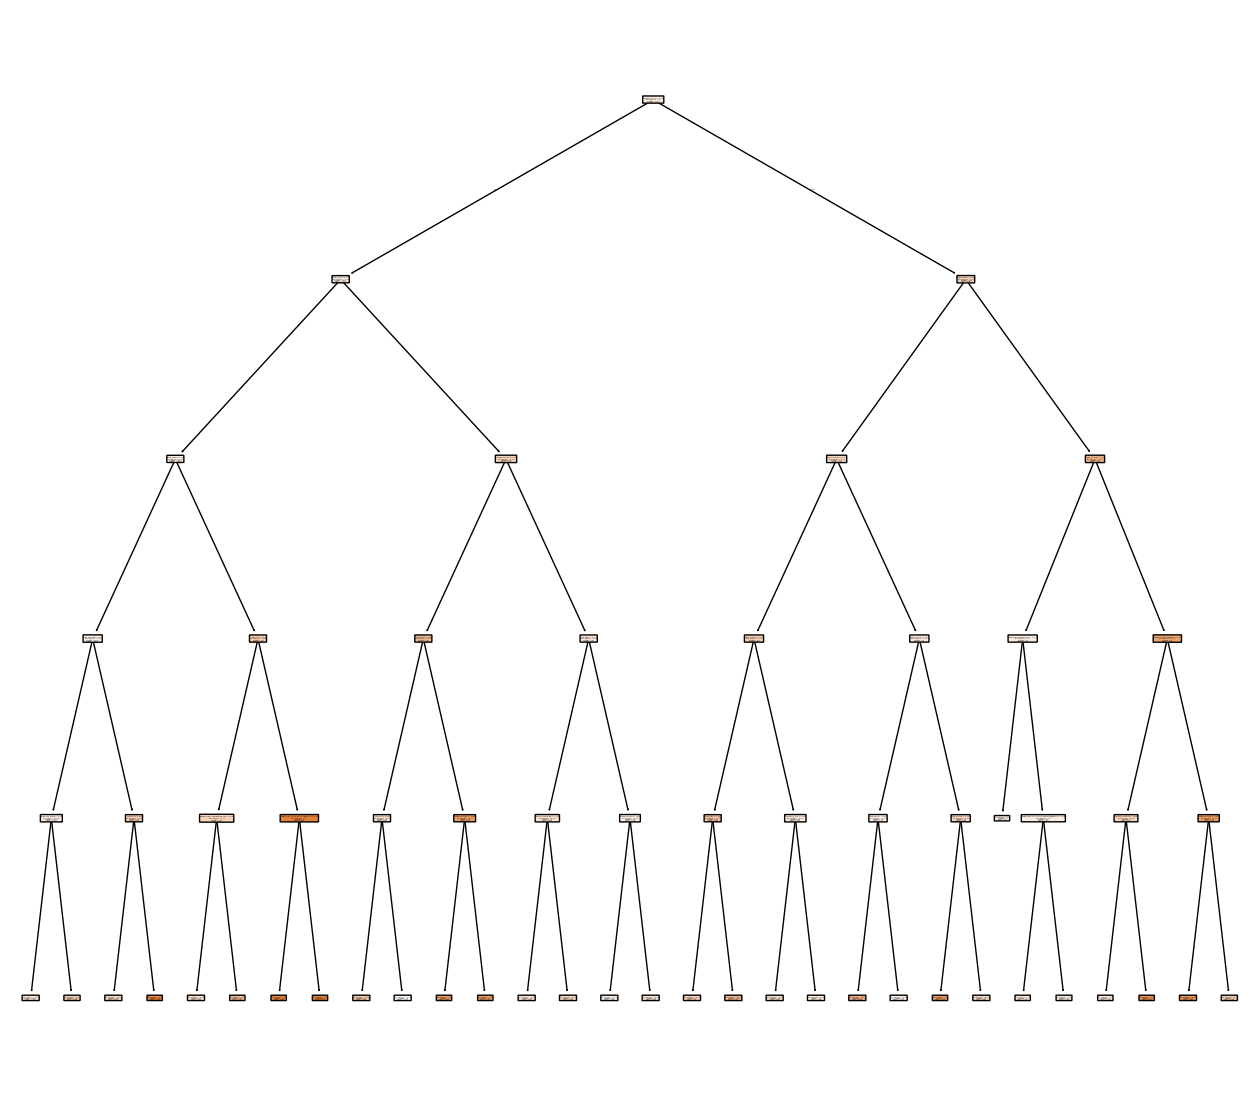

 Depth of decision tree => 5

 MSE on train data => 0.8899
 MAE on train data => 0.7111
 Accuracy on train data => 1.0000

 MSE on validation data => 0.8682
 MAE on validation data => 0.6996
 Accuracy on validation data => 0.7097

 MSE on test data => 0.9114
 MAE on test data => 0.7176
 Accuracy on test data => 0.7041



In [ ]:
for tree in noise_decision_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(tree.feature_names_in_), filled=True, rounded=True)
    plt.show()
    y_pred_train = tree.predict(X_train)
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)
    threshold = 0.1

    y_pred_train_bin = (y_pred_train <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)


    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",


          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n",
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n")

## 5.2 Тепер побудуємо дерево для знешумлених даних:

In [ ]:
depths = [1, 2, 5]
denoise_decision_trees = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=32)
    model.fit(X_train_denoised, y_train)
    denoise_decision_trees.append(model)

Відобразимо:

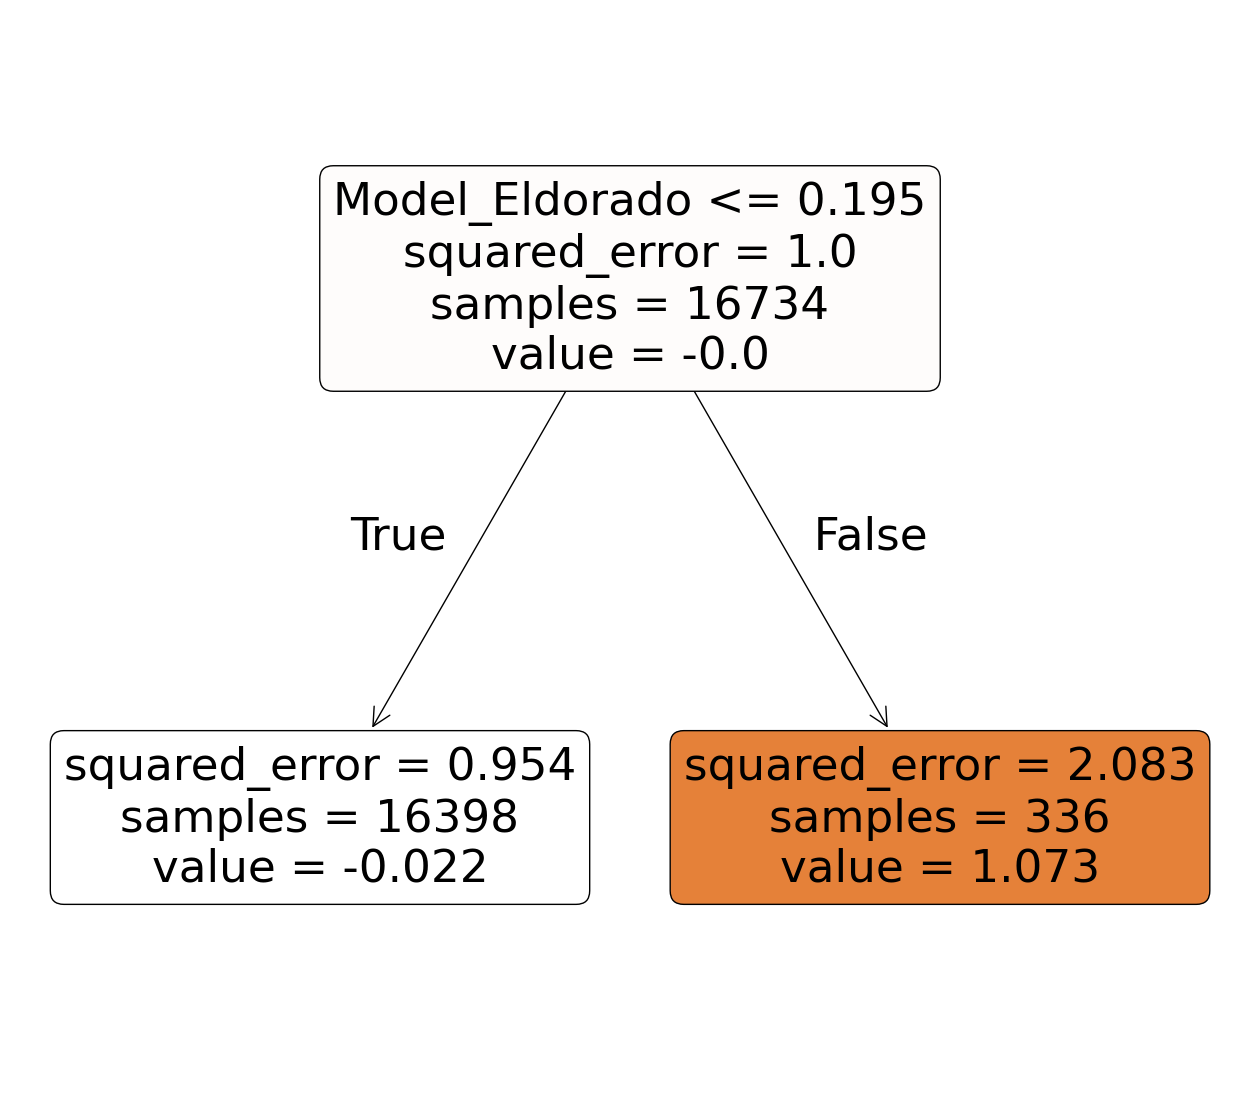

 Depth of decision tree => 1

 MSE on train data => 0.9920
 MAE on train data => 0.7577
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9768
 MAE on validation data => 0.7498
 Accuracy on validation data => 0.6941

 MSE on test data => 1.0144
 MAE on test data => 0.7657
 Accuracy on test data => 0.6860



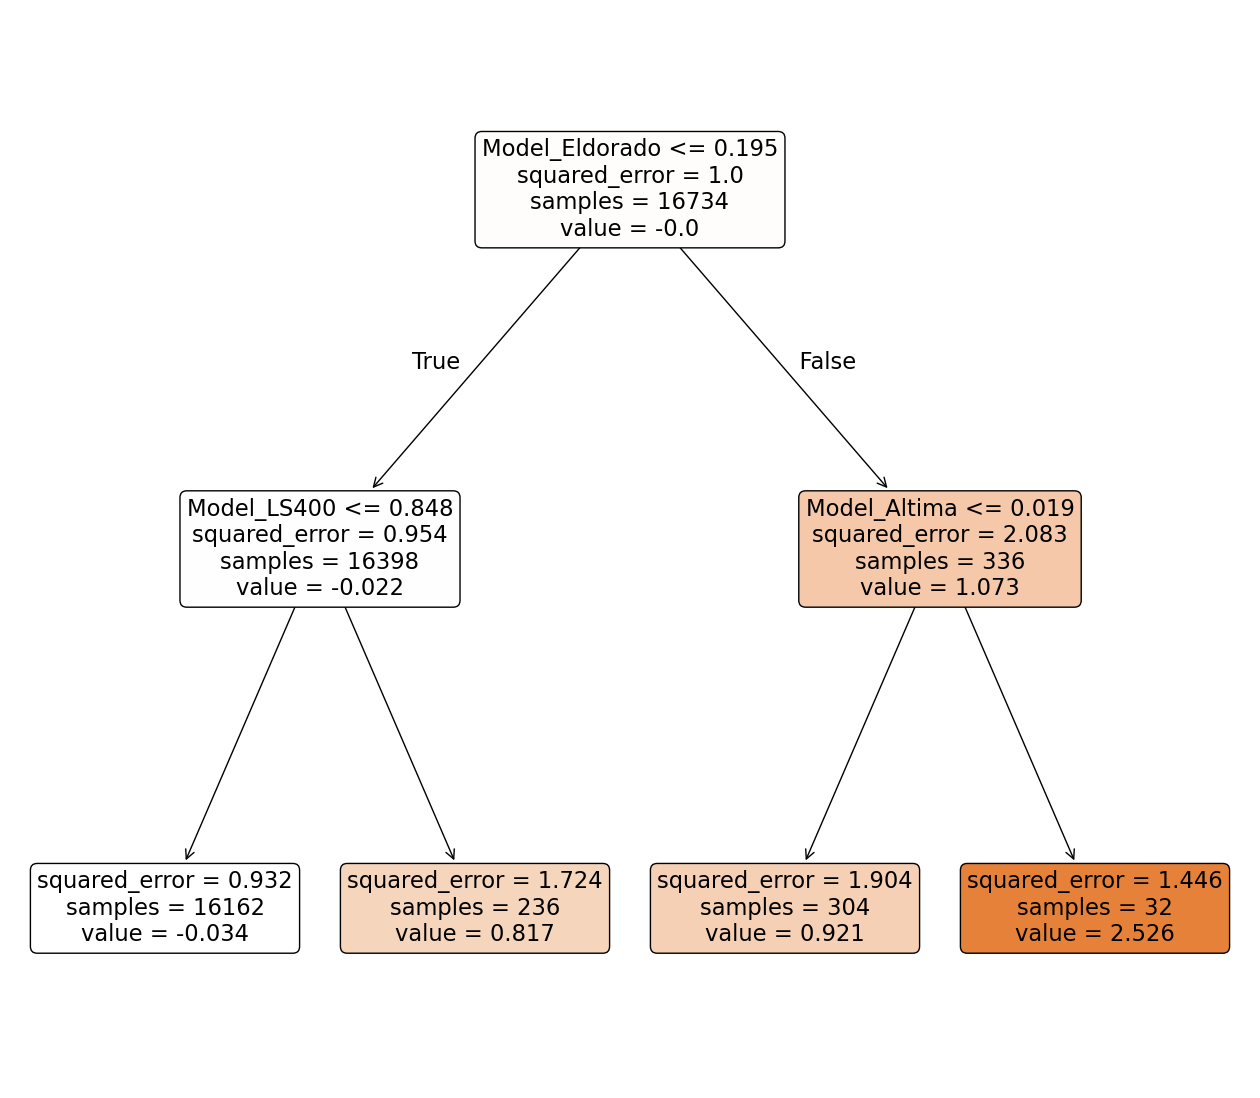

 Depth of decision tree => 2

 MSE on train data => 0.9822
 MAE on train data => 0.7530
 Accuracy on train data => 1.0000

 MSE on validation data => 0.9603
 MAE on validation data => 0.7431
 Accuracy on validation data => 0.6972

 MSE on test data => 1.0056
 MAE on test data => 0.7614
 Accuracy on test data => 0.6866



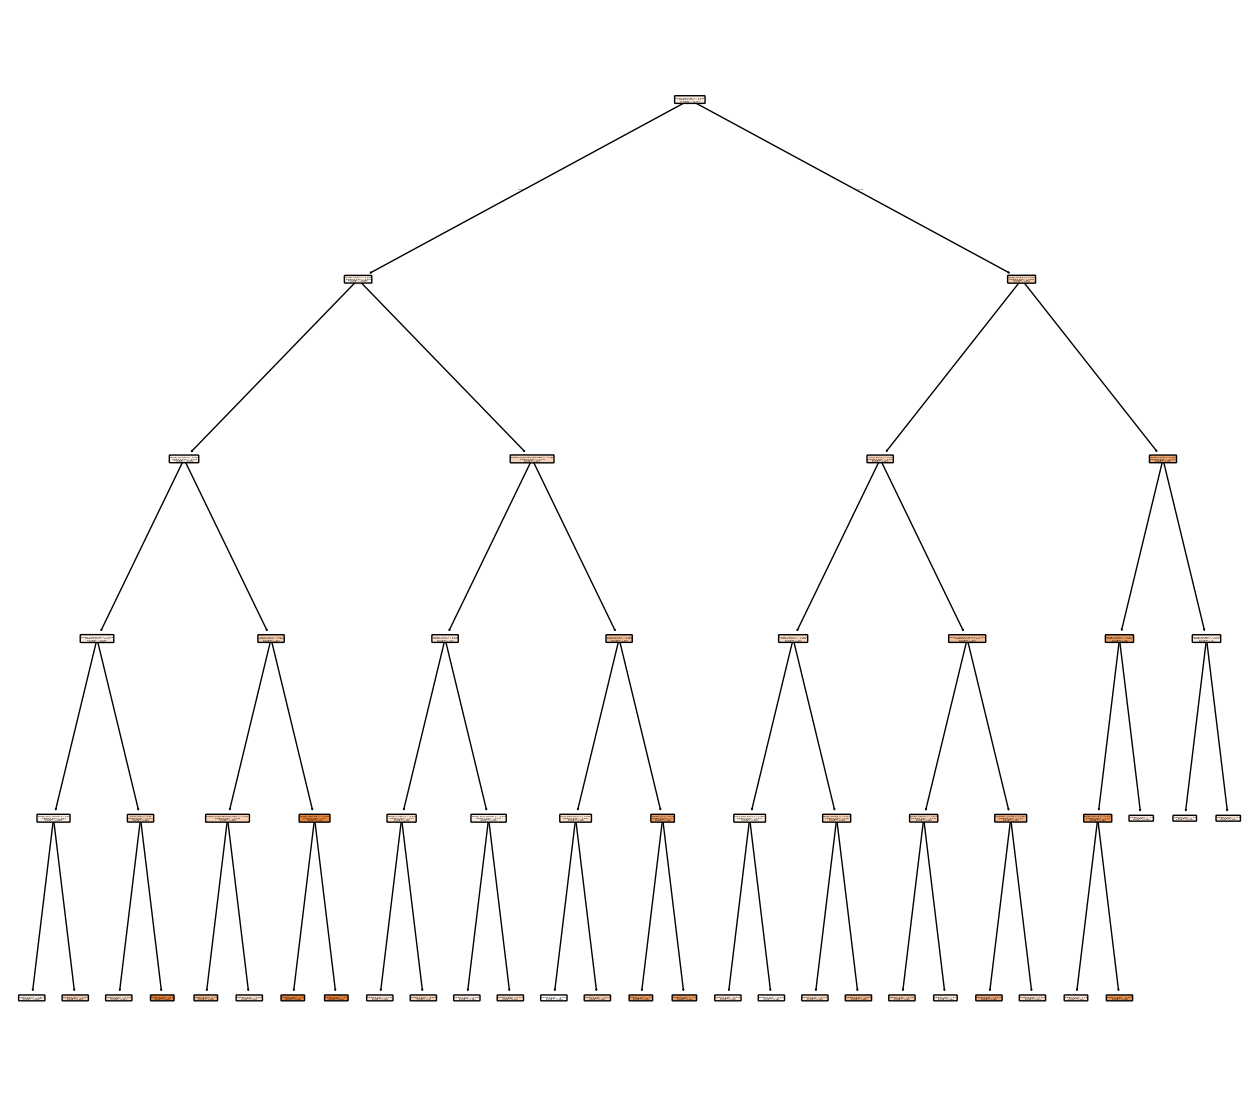

 Depth of decision tree => 5

 MSE on train data => 0.9197
 MAE on train data => 0.7228
 Accuracy on train data => 1.0000

 MSE on validation data => 0.8922
 MAE on validation data => 0.7099
 Accuracy on validation data => 0.7011

 MSE on test data => 0.9400
 MAE on test data => 0.7300
 Accuracy on test data => 0.6935



In [ ]:
for tree in denoise_decision_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(noise_decision_trees[0].feature_names_in_), filled=True, rounded=True)
    plt.show()
    y_pred_train = tree.predict(X_train)
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)
    threshold = 0.1

    y_pred_train_bin = (y_pred_train <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)


    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",


          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n",
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n")

**Глибина 1:** Точність на валідаційній вибірці — **69.4%**, на тестовій — **68.6%**.

**Глибина 2:** валідаційній вибірці — **69.7%**, на тестовій вибірці — **68.6%**.

**Глибина 5:** точність на валідаційній вибірці — **70.1%**, на тестовій — **69.3%**.

# **Виcновок**

**Оригінальні дані:**

Глибина 1: Валідаційна точність — 69.3%, тестова — 69.1%.

Глибина 2: Валідаційна точність — 69.6%, тестова — 69.1%.

Глибина 5: Валідаційна точність — 70.8%, тестова — 70.3%.

**Зашумлені дані:**

Глибина 1: Валідаційна точність — 69.3%, тестова — 69.1%.

Глибина 2: Валідаційна точність — 69.6%, тестова — 69.1%.

Глибина 5: Валідаційна точність — 70.9%, тестова — 70.4%.

**Знешумлені дані:**

Глибина 1: Валідаційна точність — 69.4%, тестова — 68.6%.

Глибина 2: Валідаційна точність — 69.7%, тестова — 68.6%.

Глибина 5: Валідаційна точність — 70.1%, тестова — 69.3%.